In [1]:
import numpy as np
from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from PCA_Functions import *
os.chdir('Synthetic_3')

Using TensorFlow backend.


## Define Parameters

In [2]:
k = 50 # Used to compute the precision @ k

## Read Datasets

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()

## PCA Method

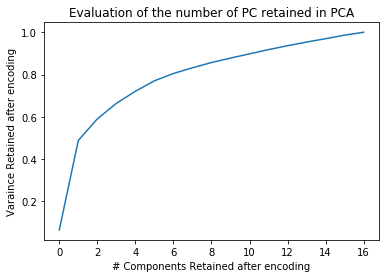

In [4]:
evaludate_pc(data,labels)

In [5]:
# Define the number of Principal Components to keep from the image
n_components  = 12

# Compute PCA with the normal data only
data_pca,pca_matrix, component_mean = pca_all_processes(data,labels,n_components,decode = False)

## Anomaly Detection with Multivariate Gaussian

In [6]:
# Reconstruct the training and test set
data_train_pca = encode_pca(data_train, component_mean,pca_matrix,n_components)
data_test_pca = encode_pca(data_test, component_mean,pca_matrix,n_components)

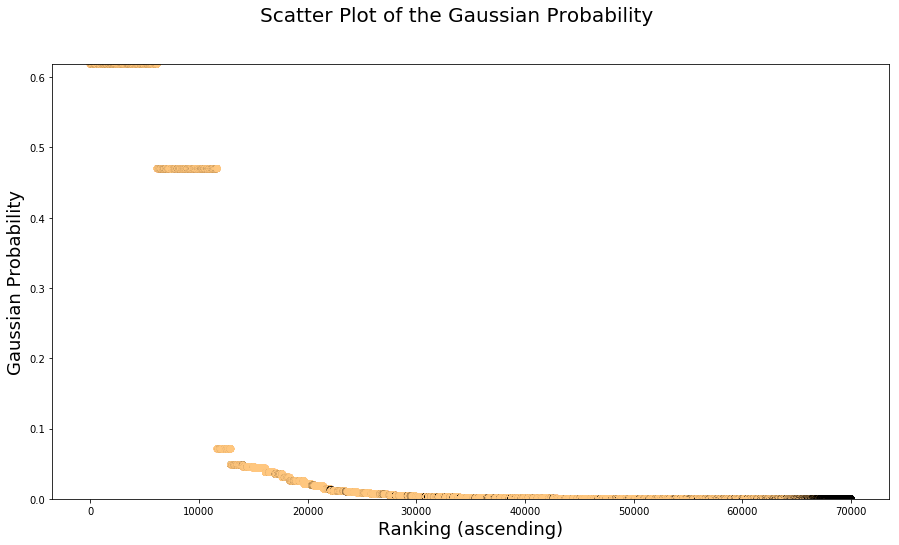

Training Results:
Precision: 14.2%
Recall: 86.3%
F-score: 24.4%
R-Precision (# R = 7051.0): 63.1%
Precision@50: 100.0%

Precision: 13.8%
Recall: 86.5%
F-score: 23.8%
R-Precision (# R = 2949.0): 63.3%
Precision@50: 100.0%


In [7]:
train_test_with_gaussian(data_train, data_test, labels_train, labels_test,k)

### Check Diagonal

Description of the data: 
# Data Points: 30000
# Dimensions: 12


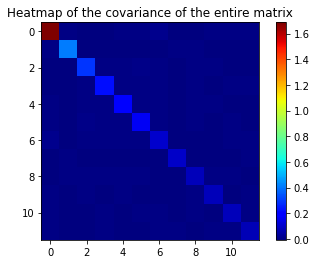

In [8]:
plot_heatmap_of_cov(data_test_pca)